In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import numpy as np

iris = datasets.load_iris()
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

In [4]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

C:\Users\hp\AppData\Local\Temp\ipykernel_3664\3786049350.py:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labelkmeans[category] = mode(iris.target[category])[0]
C:\Users\hp\AppData\Local\Temp\ipykernel_3664\3786049350.py:36: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this 

Text(0, 0.5, 'Petal_Width')

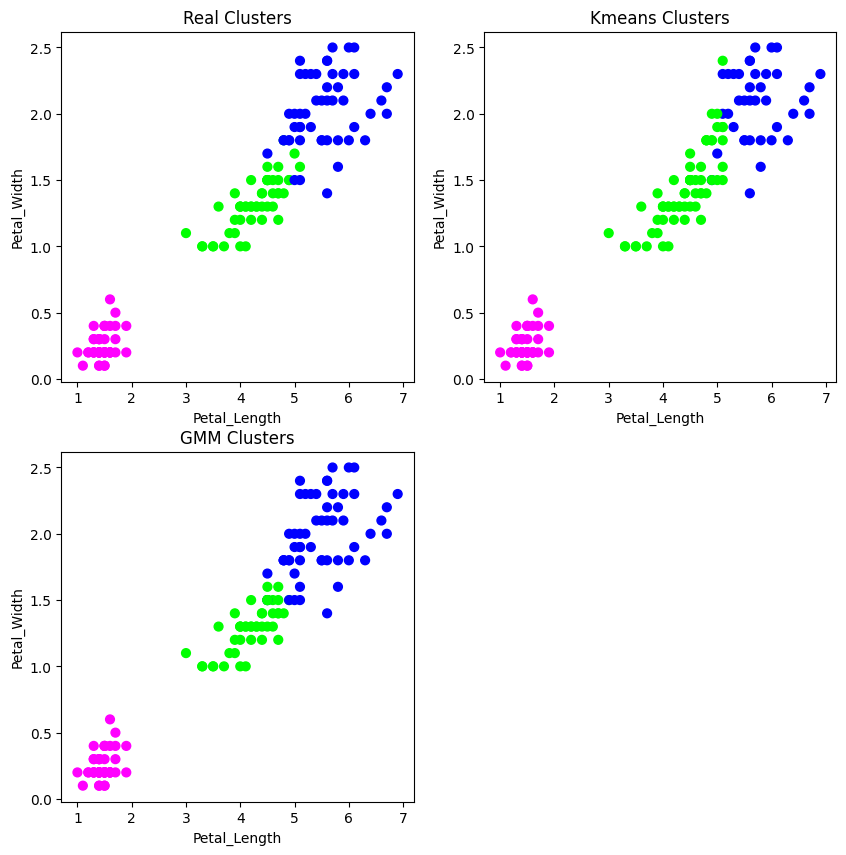

In [31]:
# k means

Kmeans = KMeans(n_clusters = 3)
clusters = Kmeans.fit_predict(x)

from scipy.stats import mode
labelkmeans = np.zeros_like(clusters)

for i in range(3):
    category = (clusters == i)
    labelkmeans[category] = mode(iris.target[category])[0]
    
    
    

# GMM

from sklearn import preprocessing

#transforming data to get mean=0 and std. dev. = 1
scaler = preprocessing.StandardScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)

xs = pd.DataFrame(scaled_x,columns = x.columns)

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 3)
gmm_y = gmm.fit_predict(xs)

labels = np.zeros_like(clusters)

for i in range(3):
    cat = (gmm_y == i)
    labels[cat] = mode(iris.target[cat])[0]

plt.figure(figsize=(10,10))
colormap = np.array(['magenta','lime','blue'])




#original classification 

plt.subplot(2,2,1)
plt.scatter(x.Petal_Length, x.Petal_Width, c = colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')

# plot k means

plt.subplot(2,2,2)
plt.scatter(x.Petal_Length, x.Petal_Width, c = colormap[labelkmeans], s=40)
plt.title('Kmeans Clusters')
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')

# plot gmm

plt.subplot(2,2,3)
plt.scatter(x.Petal_Length, x.Petal_Width, c = colormap[labels], s=40)
plt.title('GMM Clusters')
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')


# # GMM

# from sklearn import preprocessing

# #transforming data to get mean=0 and std. dev. = 1
# scaler = preprocessing.StandardScaler()
# scaler.fit(x)
# scaled_x = scaler.transform(x)

# xs = pd.DataFrame(scaled_x,columns = x.columns)

# from sklearn.mixture import GaussianMixture

# gmm = GaussianMixture(n_components = 3)
# gmm_y = gmm.fit_predict(xs)

# labels = np.zeros_like(clusters)

# for i in range(3):
#     cat = (gmm_y == i)
#     labels[cat] = mode(iris.target[cat])[0]
    
    

# plt.figure(figsize=(10,10))



Text(0, 0.5, 'Sepal_Width')

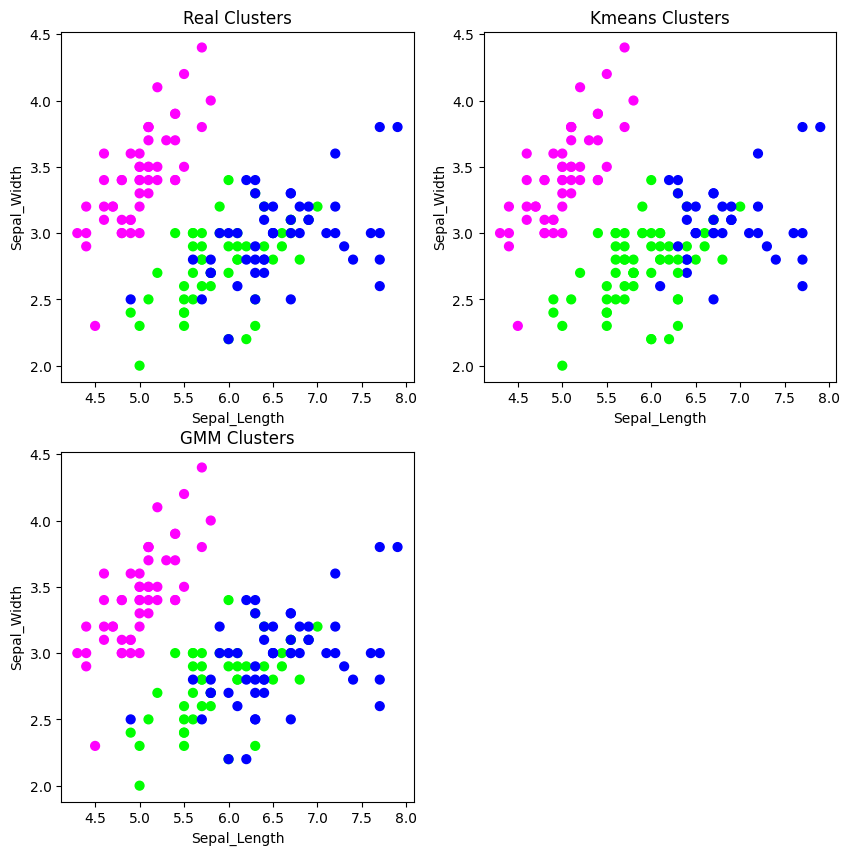

In [35]:

plt.figure(figsize=(10,10))
colormap = np.array(['magenta','lime','blue'])


plt.subplot(2,2,1)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c = colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')

# plot k means

plt.subplot(2,2,2)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c = colormap[labelkmeans], s=40)
plt.title('Kmeans Clusters')
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')

# plot gmm

plt.subplot(2,2,3)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c = colormap[labels], s=40)
plt.title('GMM Clusters')
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')

Text(0, 0.5, 'Petal_Width')

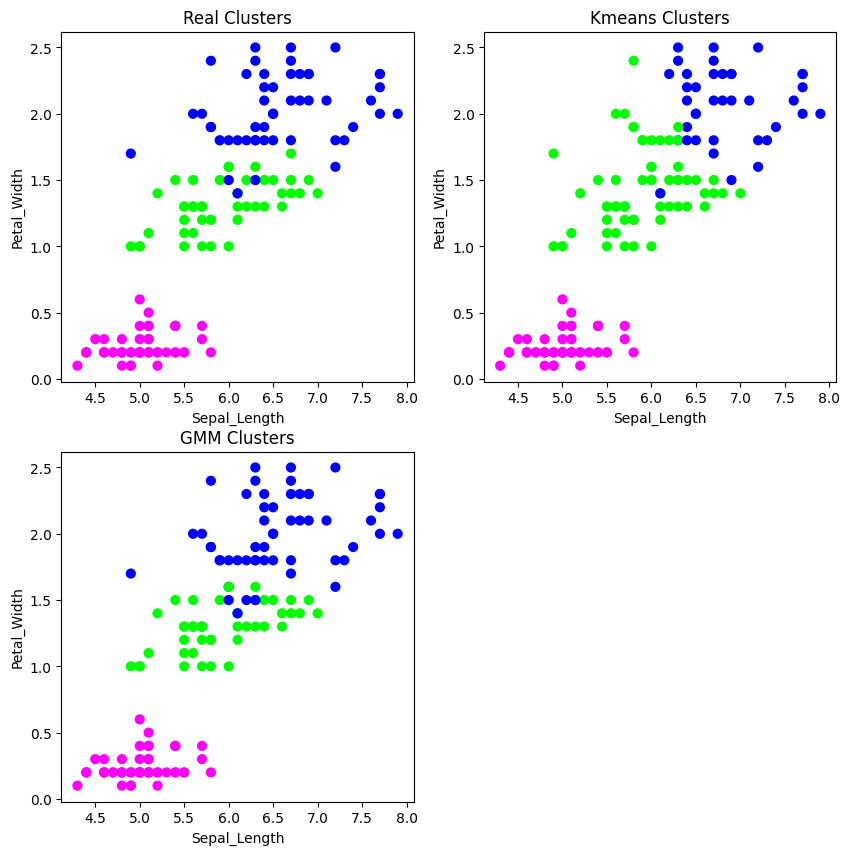

In [36]:
plt.figure(figsize=(10,10))
colormap = np.array(['magenta','lime','blue'])


plt.subplot(2,2,1)
plt.scatter(x.Sepal_Length, x.Petal_Width, c = colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Sepal_Length')
plt.ylabel('Petal_Width')

# plot k means

plt.subplot(2,2,2)
plt.scatter(x.Sepal_Length, x.Petal_Width, c = colormap[labelkmeans], s=40)
plt.title('Kmeans Clusters')
plt.xlabel('Sepal_Length')
plt.ylabel('Petal_Width')

# plot gmm

plt.subplot(2,2,3)
plt.scatter(x.Sepal_Length, x.Petal_Width, c = colormap[labels], s=40)
plt.title('GMM Clusters')
plt.xlabel('Sepal_Length')
plt.ylabel('Petal_Width')

Text(0, 0.5, 'Sepal_Width')

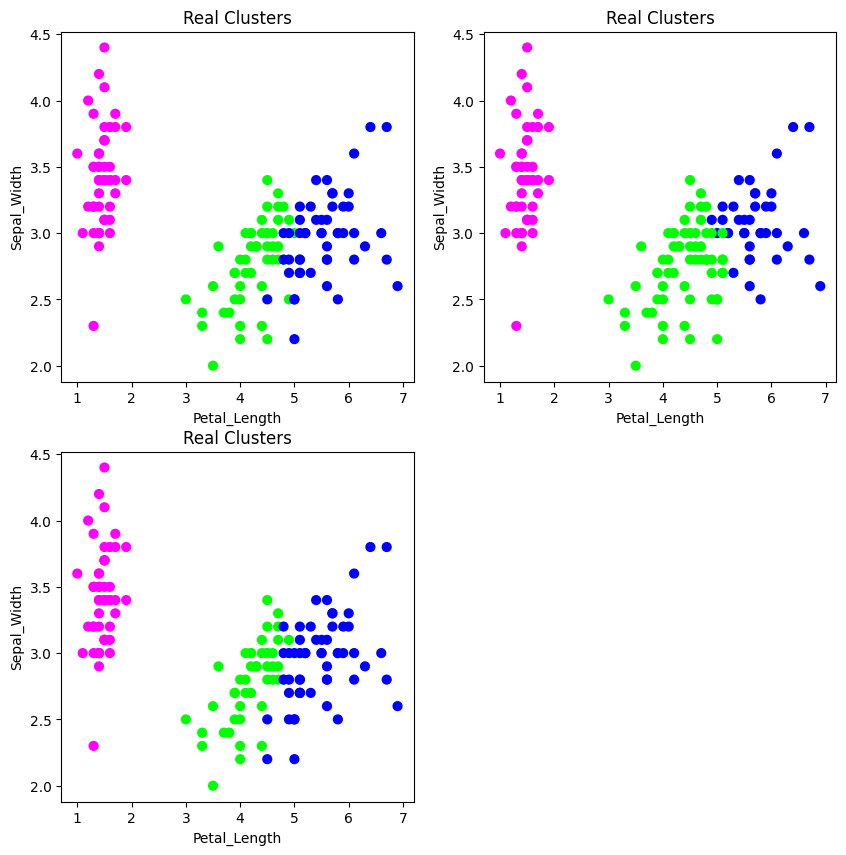

In [37]:
plt.figure(figsize=(10,10))
colormap = np.array(['magenta','lime','blue'])


plt.subplot(2,2,1)
plt.scatter(x.Petal_Length, x.Sepal_Width, c = colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal_Length')
plt.ylabel('Sepal_Width')

# plot k means


plt.subplot(2,2,2)
plt.scatter(x.Petal_Length, x.Sepal_Width, c = colormap[labelkmeans], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal_Length')
plt.ylabel('Sepal_Width')

# plt.subplot(2,2,2)
# plt.scatter(x.Sepal_Length, x.Petal_Width, c = colormap[labelkmeans], s=40)
# plt.title('Kmeans Clusters')
# plt.xlabel('Sepal_Length')
# plt.ylabel('Petal_Width')

# plot gmm


plt.subplot(2,2,3)
plt.scatter(x.Petal_Length, x.Sepal_Width, c = colormap[labels], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal_Length')
plt.ylabel('Sepal_Width')


# plt.subplot(2,2,3)
# plt.scatter(x.Sepal_Length, x.Petal_Width, c = colormap[labels], s=40)
# plt.title('GMM Clusters')
# plt.xlabel('Sepal_Length')
# plt.ylabel('Petal_Width')

Text(0, 0.5, 'Sepal_Length')

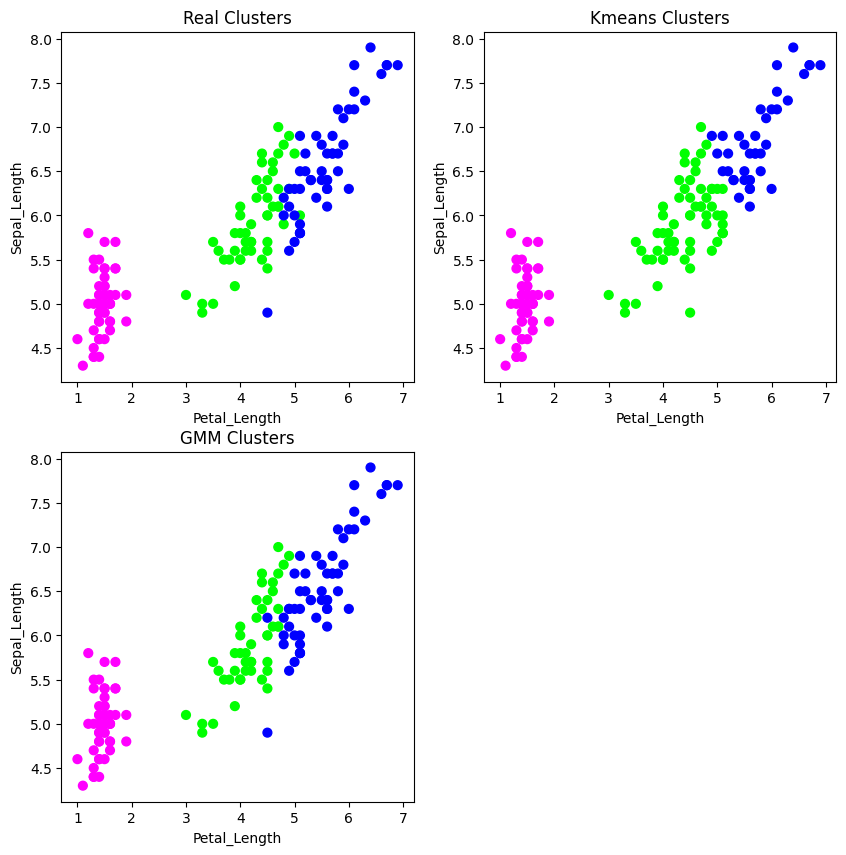

In [38]:
plt.figure(figsize=(10,10))
colormap = np.array(['magenta','lime','blue'])


plt.subplot(2,2,1)
plt.scatter(x.Petal_Length, x.Sepal_Length, c = colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal_Length')
plt.ylabel('Sepal_Length')

# plot k means

plt.subplot(2,2,2)
plt.scatter(x.Petal_Length, x.Sepal_Length, c = colormap[labelkmeans], s=40)
plt.title('Kmeans Clusters')
plt.xlabel('Petal_Length')
plt.ylabel('Sepal_Length')

# plot gmm

plt.subplot(2,2,3)
plt.scatter(x.Petal_Length, x.Sepal_Length, c = colormap[labels], s=40)
plt.title('GMM Clusters')
plt.xlabel('Petal_Length')
plt.ylabel('Sepal_Length')

Text(0, 0.5, 'Sepal_Width')

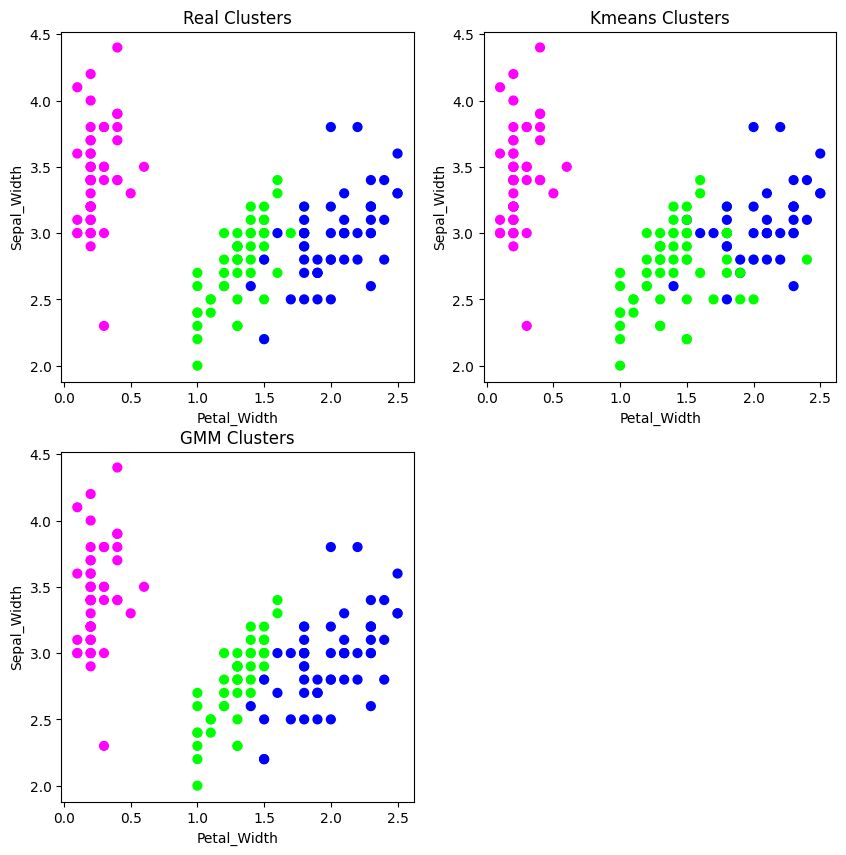

In [39]:
plt.figure(figsize=(10,10))
colormap = np.array(['magenta','lime','blue'])


plt.subplot(2,2,1)
plt.scatter(x.Petal_Width, x.Sepal_Width, c = colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal_Width')
plt.ylabel('Sepal_Width')

# plot k means

plt.subplot(2,2,2)
plt.scatter(x.Petal_Width, x.Sepal_Width, c = colormap[labelkmeans], s=40)
plt.title('Kmeans Clusters')
plt.xlabel('Petal_Width')
plt.ylabel('Sepal_Width')

# plot gmm

plt.subplot(2,2,3)
plt.scatter(x.Petal_Width, x.Sepal_Width, c = colormap[labels], s=40)
plt.title('GMM Clusters')
plt.xlabel('Petal_Width')
plt.ylabel('Sepal_Width')